In [168]:
import torch
def int_to_binary_tensor(x: torch.Tensor, bits=7):
    return torch.tensor([
        [int(b) for b in format(int(val.item()), f'0{bits}b')]
        for val in x
    ], dtype=torch.float)

x_raw = torch.randint(0, 100, (100, 1)).float()
x_bin = int_to_binary_tensor(x_raw)  # wejścia jako ciągi 7-bitowe
y = (x_raw % 3 == 0).float()         # etykieta: czy podzielne przez 3


In [169]:
import torch.nn as nn
class BinaryParityClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))


In [170]:
model = BinaryParityClassifier()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [171]:
for epoch in range(800):
    y_pred = model(x_bin)                  # forward pass
    loss = loss_fn(y_pred, y)         # obliczamy stratę

    optimizer.zero_grad()             # zerujemy gradienty
    loss.backward()                   # backpropagation
    optimizer.step()                  # aktualizacja wag

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.6251
Epoch 100, Loss: 0.3629
Epoch 200, Loss: 0.1823
Epoch 300, Loss: 0.0764
Epoch 400, Loss: 0.0343
Epoch 500, Loss: 0.0190
Epoch 600, Loss: 0.0123
Epoch 700, Loss: 0.0086


In [172]:
with torch.no_grad():
    logits = model(x_bin)
    predictions = torch.sigmoid(logits)
    predicted_labels = (predictions > 0.5).float()
    accuracy = (predicted_labels == y).float().mean()
    print("Accuracy:", accuracy.item())

Accuracy: 1.0


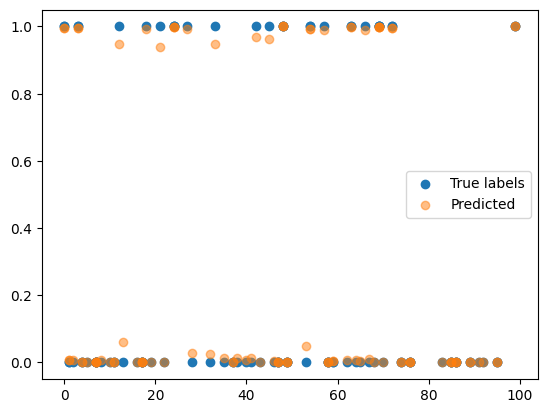

In [173]:
import matplotlib.pyplot as plt

plt.scatter(x_raw.numpy(), y.numpy(), label="True labels")
plt.scatter(x_raw.numpy(), predictions.numpy(), label="Predicted", alpha=0.5)
plt.legend()
plt.show()